# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.159302e+01     7.954240e+00
 * time: 0.002009868621826172
     1     2.780263e+01     4.201989e+00
 * time: 0.008098840713500977
     2     1.844724e+01     3.927732e+00
 * time: 0.013222932815551758
     3     1.179513e+01     2.401116e+00
 * time: 0.01809096336364746
     4     1.176026e+01     3.197918e+00
 * time: 0.021857023239135742
     5     1.067411e+01     2.006407e+00
 * time: 0.025758028030395508
     6     9.876183e+00     1.644597e+00
 * time: 0.08055496215820312
     7     9.267052e+00     1.386918e+00
 * time: 0.08441281318664551
     8     8.693555e+00     1.211421e+00
 * time: 0.08846282958984375
     9     8.313659e+00     5.763612e-01
 * time: 0.09302282333374023
    10     8.111231e+00     3.628822e-01
 * time: 0.09696197509765625
    11     8.070203e+00     8.309101e-01
 * time: 0.10015082359313965
    12     8.013909e+00     6.662059e-01
 * time: 0.10308980941772461
    13     7.964668e+00     5.244057e-01
 * 

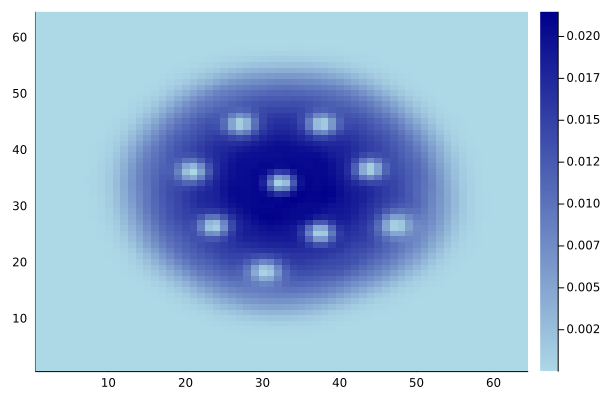

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)